In [1]:
# Imports.
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;

# Styling.
plt.style.use("ggplot");

In [23]:
# Global variables.
dataset = reader.fetch_data_from_h5("/home/thur0011/GYSELA/simulations_raw/GG2019/delta_zero/q1.5/sp0/Phi2D/Phi2D_d00850.h5");

/home/thur0011/GYSELA/custom_scripts/python/Scripts/h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");


/home/thur0011/GYSELA/custom_scripts/python/Scripts/gysela_utilities.py:121: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return np.linspace(0, 2 * np.pi, phi2D_dataset.dims["theta"]);
/home/thur0011/GYSELA/custom_scripts/python/Scripts/gysela_utilities.py:125: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  return np.linspace(0, minor_radius, phi2D_dataset.dims["r"]);
/tmp/ipykernel_144124/3327722649.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, 

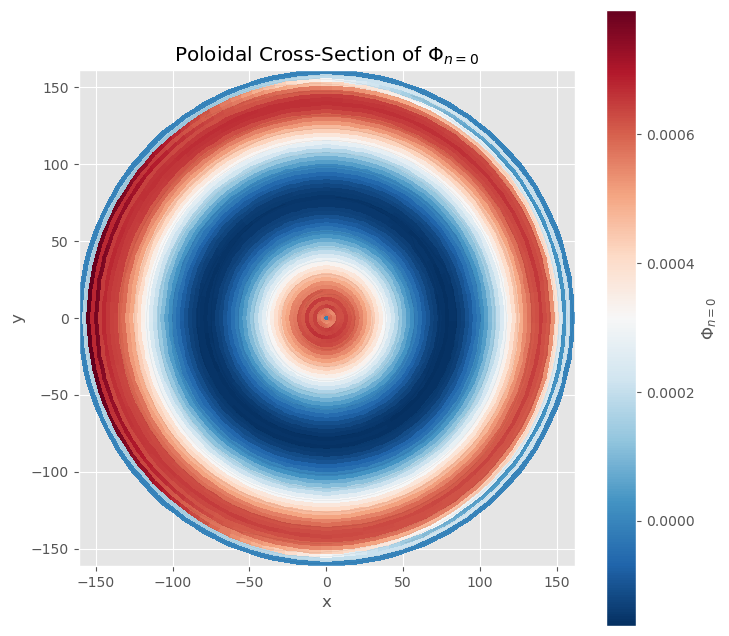

In [24]:
def plot_phi2D(phi_values):

	# Generate Cartesian mesh-grid from radial and poloidal coordinate arrays.
	x_coords, y_coords = utils.generate_xy_grid(dataset);

	# MPL logic.
	plt.figure(figsize=(8, 8))
	plt.contour(x_coords, y_coords, phi_values, colors='k', linewidths=0.1, alpha=0.3)
	plt.pcolormesh(x_coords, y_coords, phi_values, shading='nearest', cmap='RdBu_r');
	plt.gca().set_aspect('equal');
	plt.title(r'Poloidal Cross-Section of $\Phi_{n=0}$');
	plt.colorbar(label = r'$\Phi_{n=0}$');
	plt.xlabel('x');
	plt.ylabel('y');
	plt.show();

# Main script logic.
plot_phi2D(dataset["Phirth_n0"].values);

C:\Users\sethx\AppData\Local\Temp\ipykernel_14196\576396829.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x_coords, y_coords, phi_values, shading='nearest', cmap='RdBu_r');


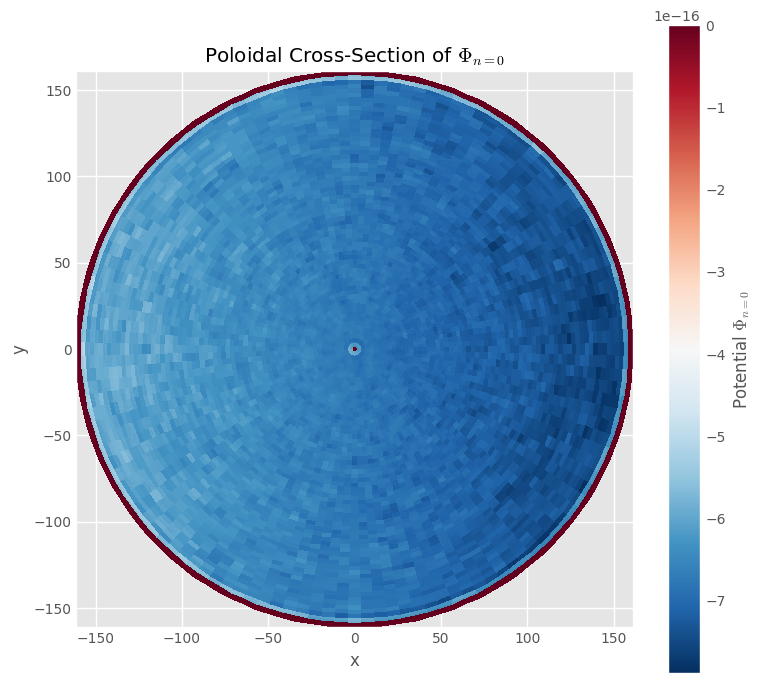

In [9]:
plot_phi2D(dataset["Phirth"].values - dataset["Phirth_n0"].values);